# Compare Policy Interventions for Baseline Scenario (Flood = "100yr"-flood)

This section analyses the combination of different policy interventions fro the baseline scenario where the flood "110yr"-flood hits.
The combination of policies are the following:
- no subsidies, no information campaign
- subsidies, no information campaign
- no subsidies, information campaign
- subsidies, information campaign


Model assumptions: (maybe order these accroding to topic later)
- Adaptation measure of elevating the house by 1.3m, cost 35,000 USD
- Subsidies are connected to the adaption measure and not to the income of the household. This means when an agent takes an adaptation measure she/he will always use the subsidy.
- A risk perception bias that the government controls, and which influeces the media influence on the housholds risk perception, costs the government per increase of 0.1, 2,000 USD per time step (1/4 year)
- The objective risk of no flood occuring is 50%. 5% risk of a flood the magnitude of harvey occuring, 15% for the 500yr flood, and 30% for the 100yr flood.
- Agents update their individual risk perception based on their prior risk perception, social connections, and influence through the media.
- Agents weight their indviudal utility of taking an adaption measure based on the utility function of the bayesian prospect theory. The individual utility is influenced by the individual risk perception, the ecpected damage, and the cost of adaptaiton measure.
- The damage function of when a flood hits a house (influences the damage in USD) is the same for all housholds. This means differences in housing sizes, properties of the house or equipment in the house are not considered in the damage.
- The flood damage function can be a number between 0 and 1 which is multiplied by a maximal damage of 100,000 USD
- Savings of the households are only increasing or decreasing in a range of +-5% which simulates money being saved or spent (from savings).
- The households do not commit to purchasing the adaptation measure when their residual savings afterwards would be less then 5,000 USD (if subsidies are the same amount as the cost of the measure, this would break the model as housholds with inital savings less then 5,000 USD would still not take the adaptation, eventhough it would be "free" for them)

In [1]:
# import of libraries and functions

from model import AdaptationModel
from mesa import batch_run
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define parameters for batch run

number_of_households = 100 # numbers of houshold agents in model
number_of_steps = 80 # number of time steps in model, each representing 1/4 year
time_of_flooding = 70 # time step at which flooding occurs
number_of_iterations = 25 # number of times the model is run per parameter combination selcted from the below prensented parameter space

# parameter space
subsidie_level = [0, 5000] # subsidy level in USD
information_bias = [0, 0.1] # Risk perception bias of government 

In [3]:
# Setup and run the model multiple times for different parameters

# Define fixed parameters
params = {
    "number_of_households": number_of_households,
    "flood_map_choice": "100yr", 
    "network": "watts_strogatz", 
    "probability_of_network_connection": 0.4,
    "number_of_edges": 3,
    "number_of_nearest_neighbours": 5,
    "time_of_flooding": time_of_flooding,
    "subsidie_level": subsidie_level,
    "information_bias": information_bias
}

# Creat the batch runner
results = batch_run(
    AdaptationModel,
    parameters=params,
    iterations=number_of_iterations, # number of model runs for each combination of parameters
    max_steps=number_of_steps, # maximum number of steps for each model run
    number_processes=1, # number of processes to use
    data_collection_period = 1,
)

  0%|          | 0/100 [00:00<?, ?it/s]

c:\Users\jonas.klimt\Documents\Master\Q2(2)\ABM\base_model_mesa\sen1211\Lib\site-packages\mesa\time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


In [4]:
results_df =pd.DataFrame(results) # convert results to pandas dataframe
results_df # show results


,RunId,iteration,Step,number_of_households,flood_map_choice,network,probability_of_network_connection,number_of_edges,number_of_nearest_neighbours,time_of_flooding,...,RiskPerception,PriorRiskPerception,FloodDepthActual,FloodDamageActual,IsAdapted,AdaptedAt,FriendsCount,Location,Savings,IncomeCategory
0,0,0,0,100,100yr,watts_strogatz,0.4,3,5,70,...,0.000000,NaN,0.000000,0.000000,False,NaN,2,POINT (213521.38197905937 3332158.58330763),196976.000000,high
1,0,0,0,100,100yr,watts_strogatz,0.4,3,5,70,...,1.000000,NaN,0.000000,0.000000,False,NaN,3,POINT (286482.7368513597 3301237.596137249),64246.000000,middle
2,0,0,0,100,100yr,watts_strogatz,0.4,3,5,70,...,0.577616,NaN,0.000000,0.000000,False,NaN,3,POINT (274218.44134225004 3298061.596006502),48393.000000,middle
3,0,0,0,100,100yr,watts_strogatz,0.4,3,5,70,...,0.637304,NaN,0.000000,0.000000,False,NaN,3,POINT (235381.1343781665 3287580.3872900256),53674.000000,middle
4,0,0,0,100,100yr,watts_strogatz,0.4,3,5,70,...,1.000000,NaN,0.000000,0.000000,False,NaN,5,POINT (278749.4488299869 3296043.01157973),9324.000000,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809995,99,24,80,100,100yr,watts_strogatz,0.4,3,5,70,...,0.866667,0.866667,0.000000,0.000000,False,NaN,3,POINT (240052.46333931392 3343992.284682532),79911.740447,middle
809996,99,24,80,100,100yr,watts_strogatz,0.4,3,5,70,...,0.866667,0.866667,0.599045,55883.166134,False,NaN,2,POINT (225863.4580096774 3336168.403981181),13934.040289,low
809997,99,24,80,100,100yr,watts_strogatz,0.4,3,5,70,...,0.866667,0.866667,0.000000,0.000000,False,NaN,3,POINT (224639.07431948025 3335073.8539889124),4933.759105,low
809998,99,24,80,100,100yr,watts_strogatz,0.4,3,5,70,...,0.866667,0.866667,0.000000,0.000000,False,NaN,7,POINT (292525.19312797347 3270048.394932657),6242.029222,low


In [5]:
selected_columns = results_df[["Step", "AgentID", 'Total_adapted_households', 'GovernmentSpendings', 'RiskPerception', 'FloodDamageActual','subsidie_level', 'information_bias', 'FloodDamageActual']]

# Group by "Step", "AgentID", "subsidie_level", and "information_bias" and calculate the mean
step_agent_mean = selected_columns.groupby(["Step", "AgentID", 'subsidie_level', 'information_bias']).mean()

# Reset the index so "Step", "AgentID", "subsidie_level", and "information_bias" become regular columns
step_agent_mean = step_agent_mean.reset_index()

# Group by "Step", "subsidie_level", and "information_bias" and calculate the mean
step_mean = step_agent_mean.groupby(["Step", 'subsidie_level', 'information_bias']).mean()

# Delete the "AgentID" column
step_mean = step_mean.drop(columns=["AgentID"])

# Display the result
step_mean

Total_adapted_households  \
Step subsidie_level information_bias                             
0    0              0.0                                   0.00   
                    0.1                                   0.00   
     5000           0.0                                   0.00   
                    0.1                                   0.00   
1    0              0.0                                   8.28   
...                                                        ...   
79   5000           0.1                                  17.00   
80   0              0.0                                  13.56   
                    0.1                                  14.00   
     5000           0.0                                  16.00   
                    0.1                                  17.00   

                                      GovernmentSpendings  RiskPerception  \
Step subsidie_level information_bias                                        
0    0              0.0                               0.0        0.489867   
                    0.1                            2000.0        0.507229   
     5000           0.0                               0.0        0.498198   
                    0.1                            2000.0        0.495620   
1    0              0.0                               0.0        0.740622   
...                                                   ...             ...   
79   5000           0.1                          245000.0        0.866667   
80   0              0.0                               0.0        0.833333   
                    0.1                          162000.0        0.866667   
     5000           0.0                           80000.0        0.833333   
                    0.1                          247000.0        0.866667   

                                      FloodDamageActual  FloodDamageActual  
Step subsidie_level information_bias                                        
0    0              0.0                        0.000000           0.000000  
                    0.1                        0.000000           0.000000  
     5000           0.0                        0.000000           0.000000  
                    0.1                        0.000000           0.000000  
1    0              0.0                        0.000000           0.000000  
...                                                 ...                ...  
79   5000           0.1                    18333.762104       18333.762104  
80   0              0.0                    20143.908715       20143.908715  
                    0.1                    20280.414114       20280.414114  
     5000           0.0                    19358.610026       19358.610026  
                    0.1                    18333.762104       18333.762104  

[324 rows x 5 columns]

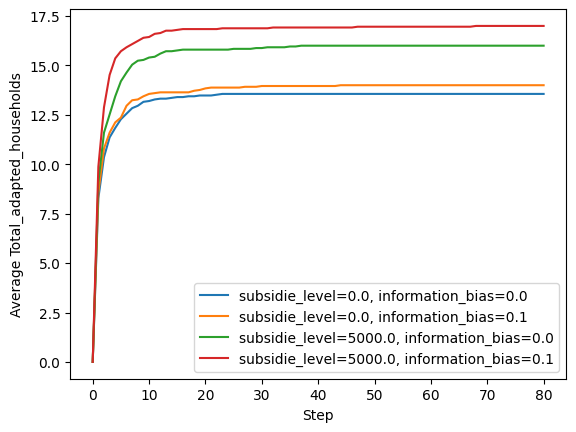

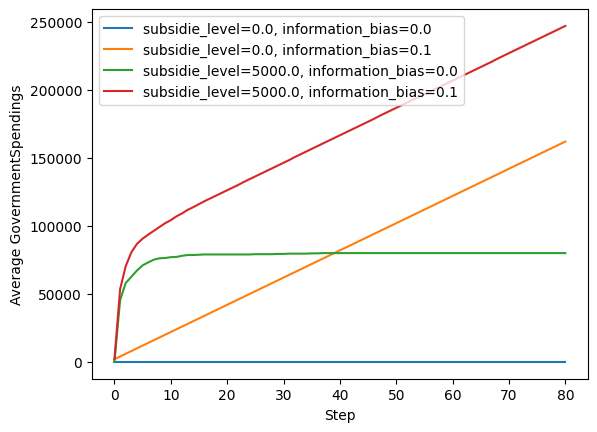

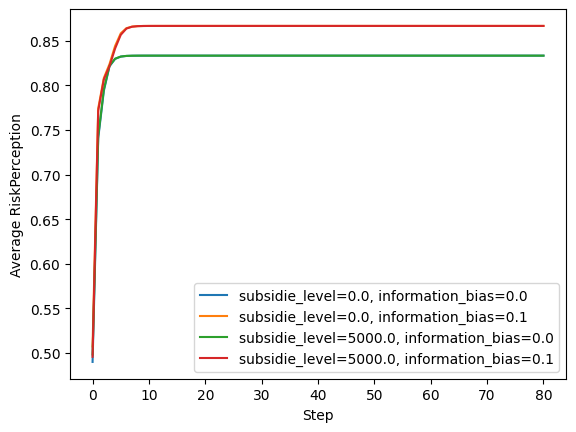

In [6]:

# Get the unique combinations of subsidie_level and information_bias
combinations = step_mean.reset_index()[['subsidie_level', 'information_bias']].drop_duplicates().values

def plot_variable(variable):
    # Create a new figure
    plt.figure()

    # Plot a line for each combination
    for subsidie_level, information_bias in combinations:
        subset = step_mean.xs((subsidie_level, information_bias), level=('subsidie_level', 'information_bias'))
        plt.plot(subset.index, subset[variable], label=f'subsidie_level={subsidie_level}, information_bias={information_bias}')

    # Add a legend
    plt.legend()

    # Add labels
    plt.xlabel('Step')
    plt.ylabel(f'Average {variable}')

    # Show the plot
    plt.show()

# Plot 'Total_adapted_households'
plot_variable('Total_adapted_households')

# Plot 'GovernmentSpendings'
plot_variable('GovernmentSpendings')

# Plot 'RiskPerception'
plot_variable('RiskPerception')


In [7]:
# Select the last step for each combination
last_step = step_mean.groupby(['subsidie_level', 'information_bias']).last()
last_step # show results

Total_adapted_households  \
subsidie_level information_bias                             
0              0.0                                  13.56   
               0.1                                  14.00   
5000           0.0                                  16.00   
               0.1                                  17.00   

                                 GovernmentSpendings  RiskPerception  \
subsidie_level information_bias                                        
0              0.0                               0.0        0.833333   
               0.1                          162000.0        0.866667   
5000           0.0                           80000.0        0.833333   
               0.1                          247000.0        0.866667   

                                 FloodDamageActual  FloodDamageActual  
subsidie_level information_bias                                        
0              0.0                    20143.908715       20143.908715  
               0.1                    20280.414114       20280.414114  
5000           0.0                    19358.610026       19358.610026  
               0.1                    18333.762104       18333.762104

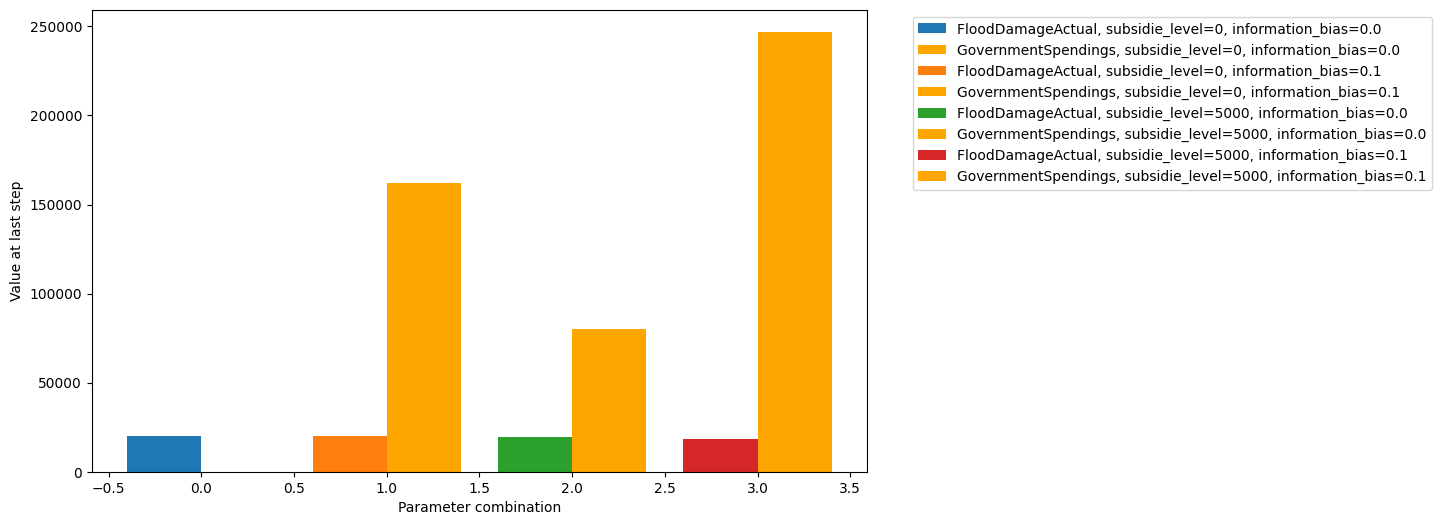

In [8]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Create two bars for each combination
for i, ((subsidie_level, information_bias), row) in enumerate(last_step.iterrows()):
    plt.bar(i - 0.2, row['FloodDamageActual'], width=0.4, label=f'FloodDamageActual, subsidie_level={subsidie_level}, information_bias={information_bias}')
    plt.bar(i + 0.2, row['GovernmentSpendings'], width=0.4, color='orange', label=f'GovernmentSpendings, subsidie_level={subsidie_level}, information_bias={information_bias}')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels
plt.xlabel('Parameter combination')
plt.ylabel('Value at last step')

# Show the plot
plt.show()
